- Data source is Kaggle.

- https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#Importing data using Pandas

#lines parameter is set as True- because every new object is separated by a new line.

df = pd.read_json('modcloth_final_data.json', lines=True)
print(df.shape)
df.head()

(82790, 18)


,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


## Observations :-

- There are missing values across the dataframe.
- Cup-size contains multiple preferences
- Height column needs to be parsed for extracting the height in a numerical quantity


In [3]:
df.columns

Index(['bra size', 'bust', 'category', 'cup size', 'fit', 'height', 'hips',
       'item_id', 'length', 'quality', 'review_summary', 'review_text',
       'shoe size', 'shoe width', 'size', 'user_id', 'user_name', 'waist'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null object
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 11.4+ MB


- Only 6 columns have complete data.
- Shoe size and Shoe width looks like data for shoes.
- Waist column has a lot on NULL values.
- columns have strings (object datatype), which needs to be parsed into the category datatype (aids in efficient memory consumption)

In [5]:
# % of missing values per column

missing_values = pd.DataFrame({'total missing': df.isnull().sum(), 'Percentage of missing values' : (df.isnull().sum()/len(df))*100})

missing_values.sort_values(by=['Percentage of missing values'], ascending=False)

,total missing,Percentage of missing values
waist,79908,96.518903
bust,70936,85.681846
shoe width,64183,77.525063
shoe size,54875,66.282160
hips,26726,32.281677
review_text,6725,8.122962
review_summary,6725,8.122962
cup size,6255,7.555260
bra size,6018,7.268994
height,1107,1.337118


In [6]:
df.describe(percentiles=[0.2,0.5,0.7,0.9])

,bra size,hips,item_id,quality,shoe size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
20%,34.000000,35.000000,200824.000000,3.000000,7.000000,5.000000,204546.000000,27.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
70%,38.000000,42.000000,647235.000000,5.000000,9.000000,15.000000,694371.000000,33.000000
90%,40.000000,49.000000,756073.000000,5.000000,10.000000,26.000000,897785.900000,39.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


 -Most of the shoe sizes are around 5-9, but the maximum shoe size is 38! 

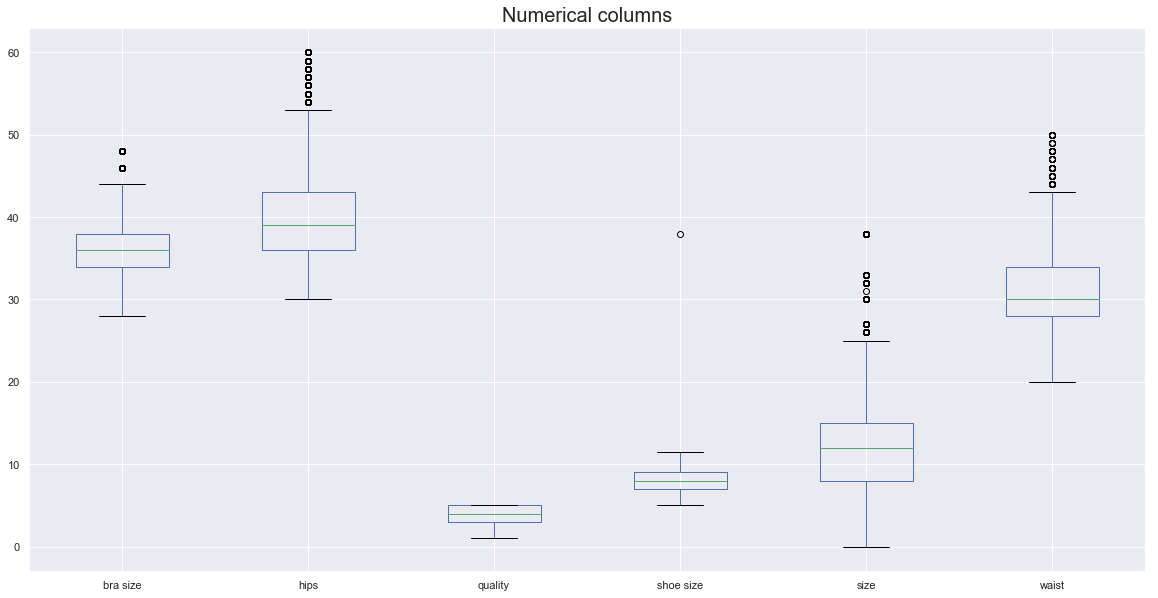

In [7]:
# Using boxplot on numerical quantities to detect outliers.

num_col = ['bra size', 'hips', 'quality', 'shoe size', 'size', 'waist']

plt.figure(figsize=(20,10))
df[num_col].boxplot()
plt.title('Numerical columns', fontsize=20)
plt.show()

- There is only one outlier in shoe size. We need to check the row and remove or handle the outlier value.


In [8]:
df[df['shoe size'] == 38]

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
37313,36.0,37-39,new,d,fit,5ft 5in,46.0,416942,just right,5.0,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr...",38.0,average,12,237498,Catslittle,35.0


In [9]:
# The entry looks to be legit. Setting the value of 'Shoe size' to None

df.at[37313, 'shoe size'] = None

## Data Cleaning and Preprocessing.

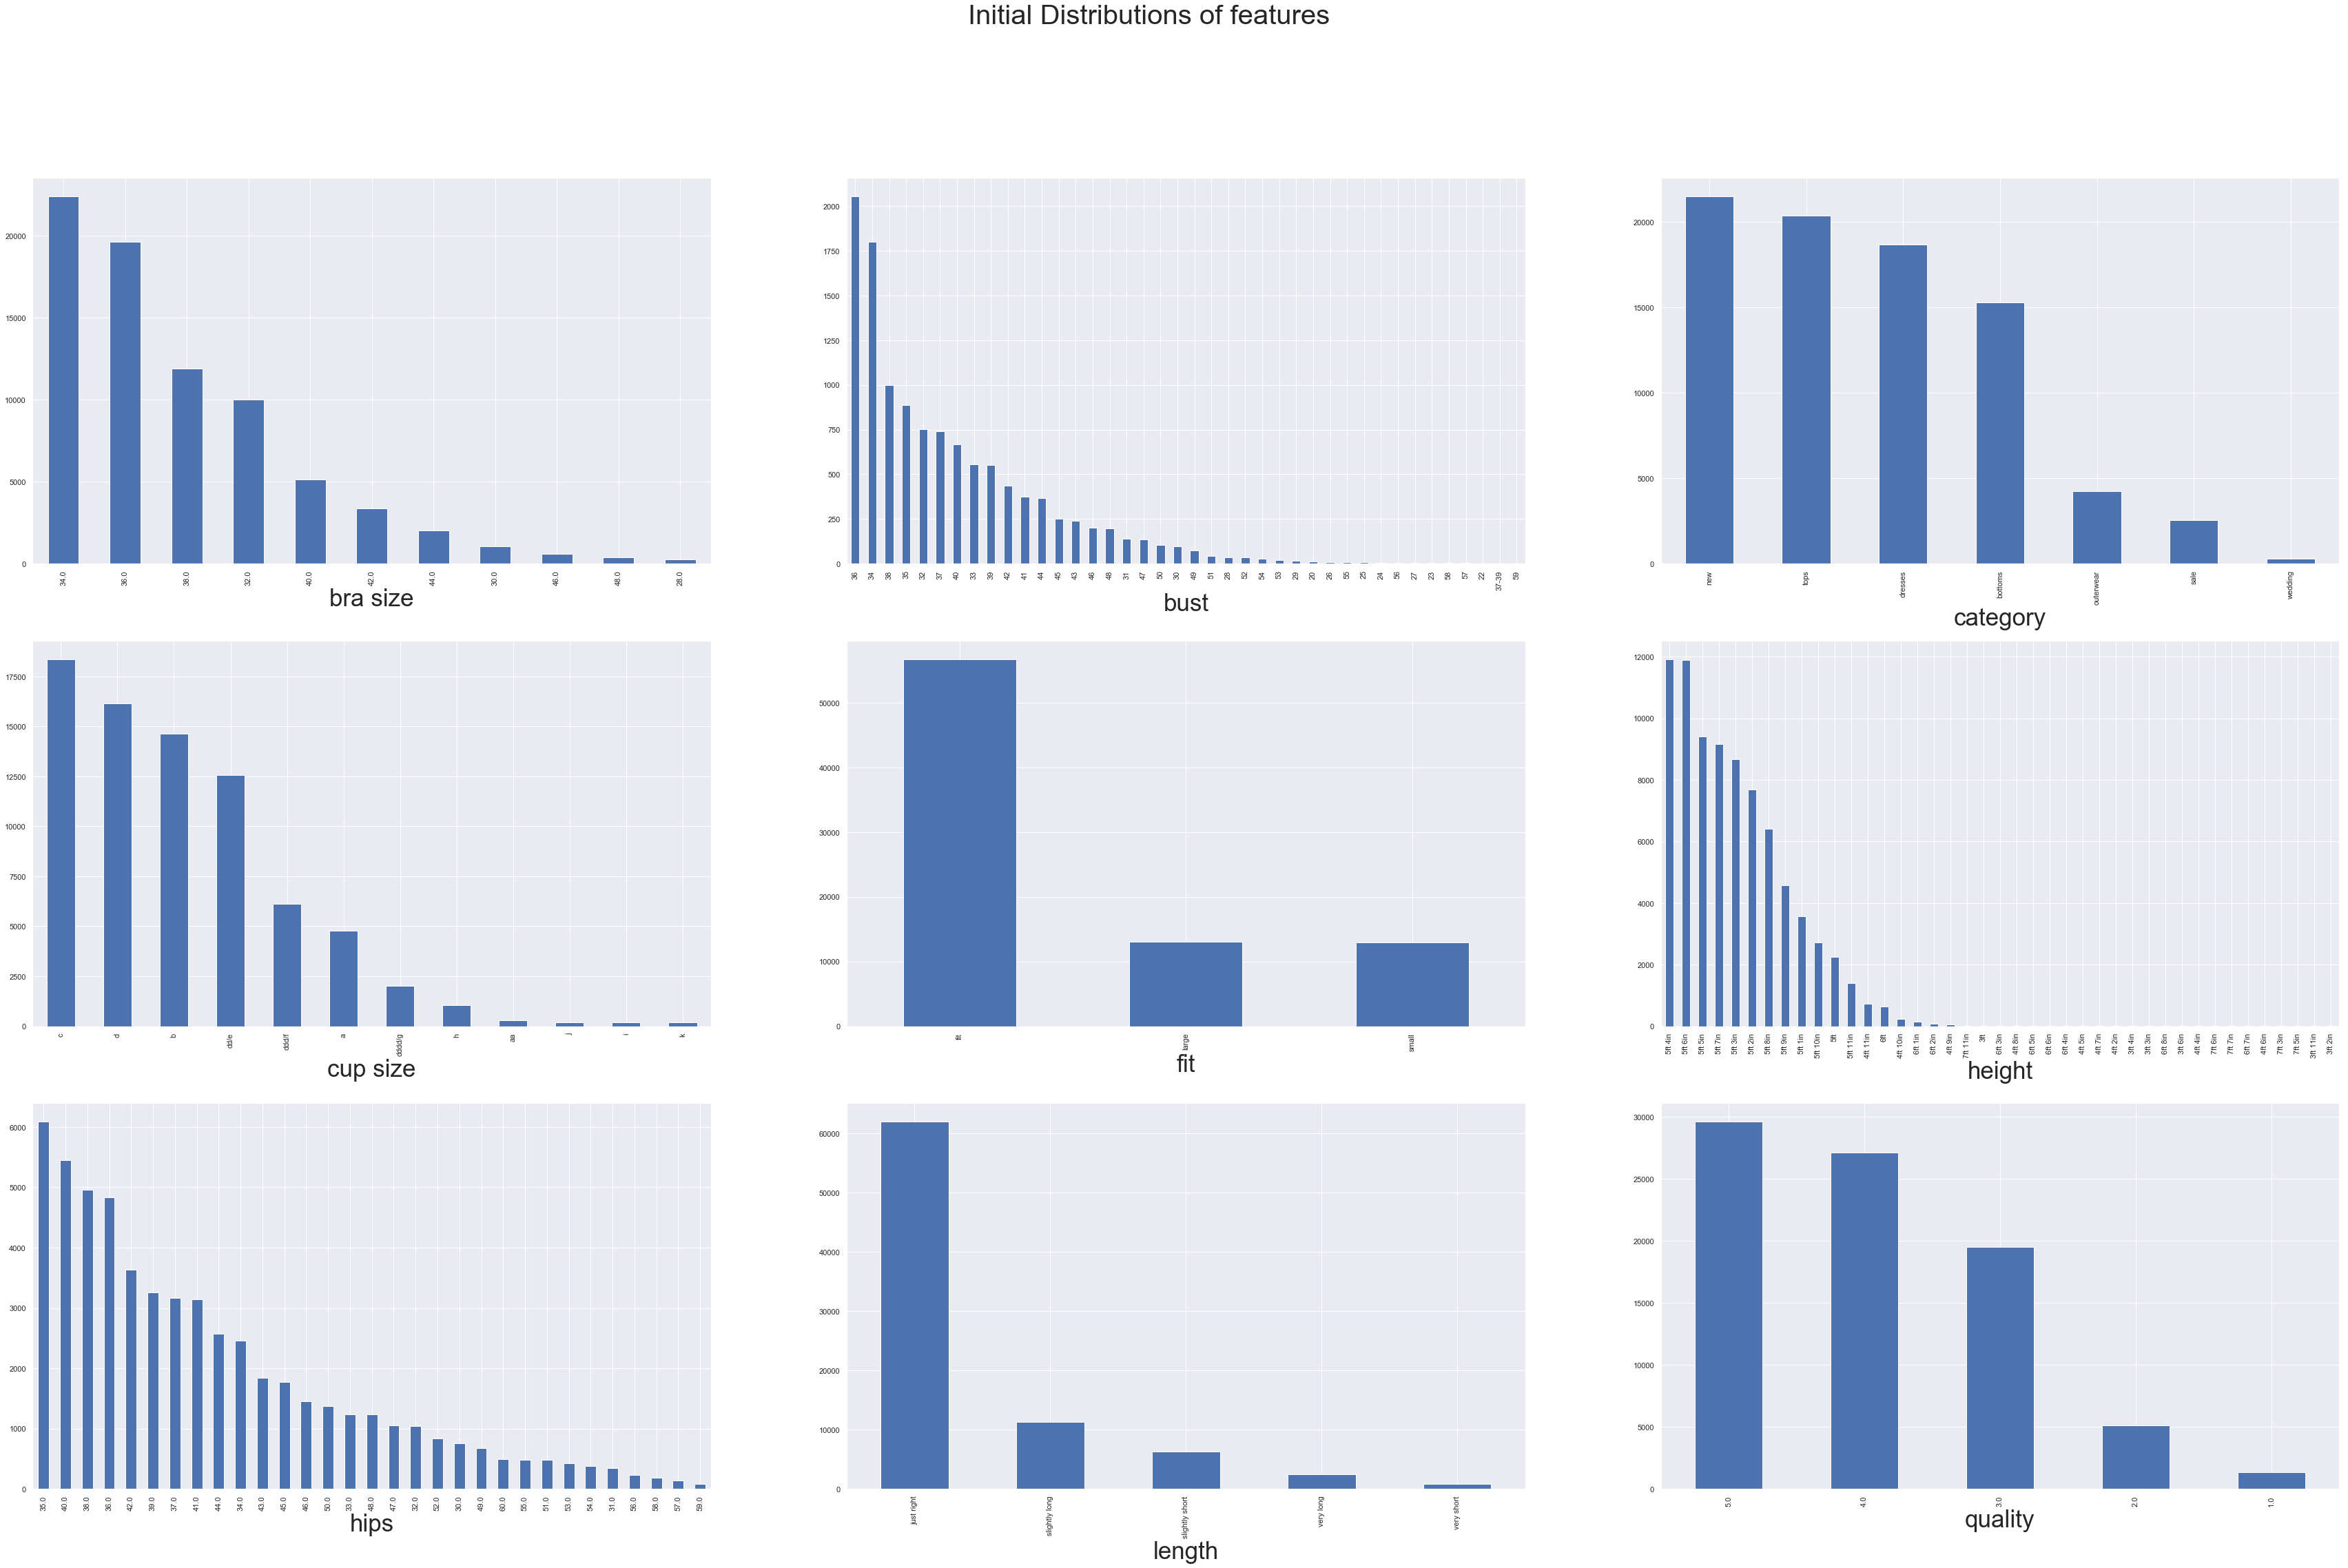

In [10]:
# A function to create distribution plot of the features.

def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot('bar', facecolor='b', ax=ax)
    ax.set_xlabel(f'{col}', fontsize=35)
    return ax

f, ax = plt.subplots(3,3, figsize = (60,35))

cols = ['bra size','bust', 'category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']

k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 40)

- bra size: Looks numerical, it only ranges from 28 to 48, with most of the sizing lying around 34-38. It makes sense to convert this to categorical dtype. We'll fill the NA values into an 'Unknown' category. We can see above that most of the buyers have a bra-sizing of 34 or 36.

- bust: Roughly 86% of the bust data is missing so we remove this feature.

- category- none missing; change to dtype category.

- cup size- Change the dtype to category for this column. This col has around 7% missing values. Taking a look at the rows where this value is missing might hint us towards how to handle these missing values.

In [11]:
df['bra size'] = df['bra size'].fillna('Unknown')

In [12]:
df['bra size'] = df['bra size'].astype('category').cat.as_ordered()

In [13]:
df.at[37313, 'bust'] = '38'

In [14]:
df.category = df.category.astype('category')

In [15]:
df[df['cup size'].isnull()]

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
61,Unknown,NaN,new,NaN,fit,5ft 3in,NaN,124024,just right,5.0,NaN,NaN,NaN,NaN,9,277450,cdpase,NaN
70,Unknown,NaN,new,NaN,fit,5ft 9in,NaN,124124,slightly long,5.0,NaN,NaN,NaN,NaN,26,29730,inevitable.cities,NaN
72,Unknown,NaN,new,NaN,fit,5ft 9in,NaN,124124,slightly short,3.0,NaN,NaN,NaN,NaN,26,497767,Josephine,NaN
99,Unknown,NaN,new,NaN,small,5ft 7in,NaN,124124,very short,1.0,NaN,NaN,NaN,NaN,12,435872,christine.koch,NaN
101,Unknown,NaN,new,NaN,small,5ft 2in,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,15,788667,meghanmurphy,NaN
107,Unknown,NaN,new,NaN,small,5ft 5in,NaN,124124,slightly short,4.0,NaN,NaN,NaN,NaN,38,737821,candlecrazy80,NaN
122,Unknown,NaN,new,NaN,fit,5ft 4in,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,730931,nsulliv5,NaN
145,Unknown,NaN,new,NaN,fit,5ft 4in,NaN,124124,slightly short,4.0,NaN,NaN,NaN,NaN,12,134273,Amanda,NaN
161,Unknown,NaN,new,NaN,fit,5ft 11in,NaN,124124,slightly short,3.0,NaN,NaN,NaN,NaN,8,666485,nativenrg,NaN
184,Unknown,NaN,new,NaN,small,5ft 2in,NaN,124124,slightly short,1.0,NaN,NaN,NaN,NaN,12,971224,sn.johnson08,NaN


In [22]:
# Converting cup size to category and replace NULL values with 'Unknown'

# Change fit to category. Vast mojority of customers have given good 'fit'

df['cup size'].fillna('Unknown', inplace=True)
df['cup size'] = df['cup size'].astype('category').cat.as_ordered()
df['fit'] = df['fit'].astype('category')

In [38]:
# Height : We need to convert the height into cms.

# Function to convert height to cms

def in_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return(float(x[0]*30.48) + float(x[4]*2.54))
    except:
        return(float(x[0])*30.48)

In [39]:
df.height = df.height.apply(in_cms)

In [43]:
df[df.height.isnull()]

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
3,Unknown,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
17,36,NaN,new,dddd/g,large,NaN,NaN,123373,just right,4.0,NaN,NaN,NaN,NaN,15,128353,Megan,NaN
43,36,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,15,670919,sdhewey,NaN
73,38,NaN,new,c,large,NaN,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,816504,Fiorella,NaN
131,36,NaN,new,c,fit,NaN,NaN,124124,very short,3.0,NaN,NaN,NaN,NaN,12,846091,jmcrowder.1124,NaN
213,40,NaN,new,d,fit,NaN,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,121007,rhea_heather,NaN
382,34,NaN,new,b,large,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,5,5752,kelsi.flatland,NaN
423,34,NaN,new,c,fit,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,7,563612,Naomi,NaN
456,38,NaN,new,b,fit,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,7,968605,shirawzn,NaN
475,30,NaN,new,dd/e,small,NaN,36.0,125442,just right,5.0,NaN,NaN,NaN,NaN,7,940714,Ingrid,NaN


- Some customers have given bra_size, cup_size data, whereas all other measurements are empty- possible first-time purchase